In [1]:
from numpy import *

from diffractio import np, sp, plt, nm, um, mm, degrees

from diffractio.vector_sources_XY import Vector_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY
from diffractio.scalar_fields_XY import Scalar_field_XY
from diffractio.scalar_sources_XY import Scalar_source_XY

from diffractio.vector_fields_XY import Vector_field_XY

## VRS vs VCZT - axicon + polarized plane wave

In [203]:
width = 250 * um
x0 = np.linspace(-width/2, width/2, 512)
y0 = np.linspace(-width/2, width/2, 512)
wavelength = .62380 * um

In [204]:
alpha = 86*degrees
n = 1.5

t = Scalar_mask_XY(x0, y0, wavelength)
t.axicon(r0=(0, 0), radius=width/2, 
         angle=(pi/2 - alpha), 
         refraction_index=n)

beta = arcsin(n*cos(alpha))+alpha-pi/2
NA = sin(beta)
print("NA = ", NA)

NA =  0.03500626461187712


In [218]:
E0 = Vector_source_XY(x0, y0, wavelength)
E0.constant_polarization(u=t, v=(1,1j))

(<AxesSubplot:title={'center':'$A_x$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$A_y$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$\\phi_x$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$\\phi_y$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>)

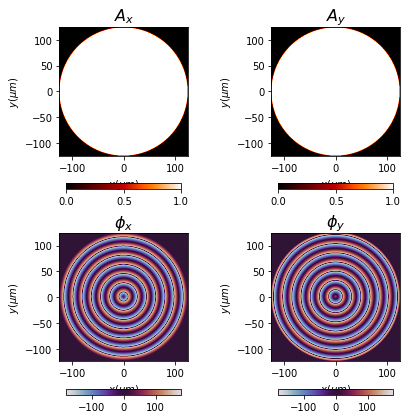

In [219]:
E0.draw('fields')

Compute the XZ distribution with CZT

In [220]:
x_samp = 50*um
x_out = linspace(-x_samp, x_samp, 512)
y_out = 0.
z = linspace(1*um,1.1*size/tan(arcsin(NA)),128)

Wall time: 34.9 s


<AxesSubplot:xlabel='$z  (\\mu m)$', ylabel='$x  (\\mu m)$'>

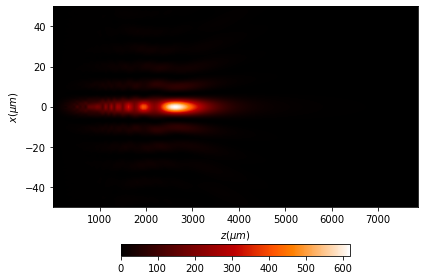

In [221]:
%%time
E1=E0.CZT(z, x_out, y_out)
E1.draw('intensity')

Wall time: 544 ms


(<AxesSubplot:title={'center':'$I_r$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$I_z$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>)

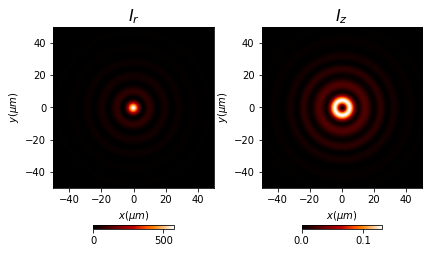

In [222]:
%%time
E1=E0.CZT(2500*um, x_out, x_out)
E1.draw('intensities_rz',logarithm=False)

(<AxesSubplot:title={'center':'$I_r$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$I_z$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>)

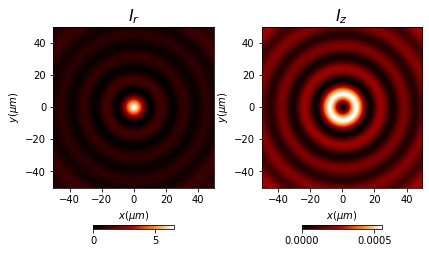

In [223]:
E1 = E0.VRS(z=5500*um, n=1, new_field=True, verbose=True, amplification=(1, 1))
E1.cut_resample(x_limits=(-x_samp, x_samp), y_limits=(-x_samp, x_samp))
E1.draw(kind='intensities_rz', logarithm=False)

## apertured axicon + circularly polarized plane wave
first apply a spatial bandpass, where light only passes through a region rmin < r < rmax

In [254]:
# good results with width, sampling =  (250*um, 512), (1000*um, 1024)
width = 1000 * um 
x0 = np.linspace(-width/2, width/2, 1024)
y0 = np.linspace(-width/2, width/2, 1024)
wavelength = .780 * um

In [260]:
alpha = 75*degrees
n = 1.5

t = Scalar_mask_XY(x0, y0, wavelength)
t.axicon(r0=(0, 0), radius=width/2, 
         angle=(pi/2-alpha), 
         refraction_index=n)

beta = arcsin(n*cos(alpha))+alpha-pi/2
NA = sin(beta)
print("NA = ", NA)

rmin = 0.2*width/2
rmax = 0.8*width/2
zmax = rmax/tan(beta)
zmin = rmin/tan(beta)

t1 = Scalar_mask_XY(x0, y0, wavelength)
t1.circle(r0=(0, 0), radius=(rmin, rmin))

t2 = Scalar_mask_XY(x0, y0, wavelength)
t2.circle(r0=(0, 0), radius=(rmax, rmax))

tmask = t1 - t2

NA =  0.1364819139661017


In [261]:
E0 = Vector_source_XY(x0, y0, wavelength)
E0.constant_polarization(u=t*tmask, v=(1,1j))
E0.normalize()

(<AxesSubplot:title={'center':'$A_x$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$A_y$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$\\phi_x$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$\\phi_y$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>)

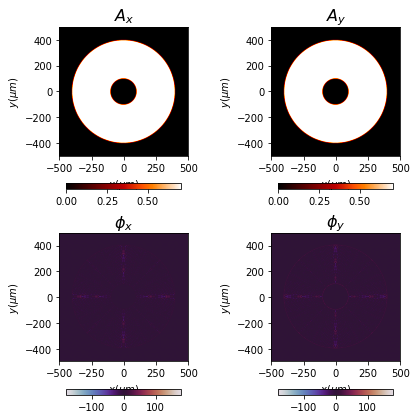

In [262]:
E0.draw('fields')

(<AxesSubplot:title={'center':'$S_0$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$S_1$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$S_2$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$S_3$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>)

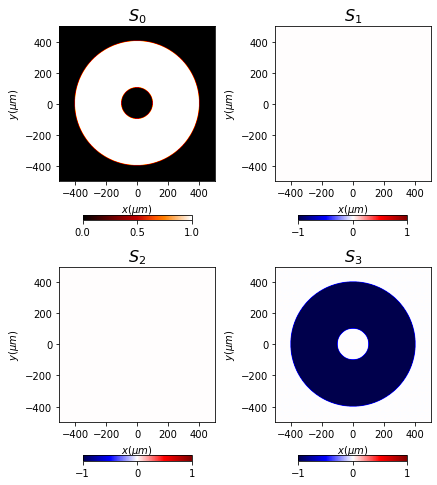

In [263]:
E0.draw('stokes')

Compute the XZ distribution with CZT

In [264]:
x_samp = 10*um
x_out = linspace(-x_samp, x_samp, 256)
y_out = 0.
z = linspace(10*um,1.5*zmax,128)
print(zmin,zmax)

725.8416400947544 2903.3665603790178


In [265]:
%%time

# compute the on-axis field
E1=E0.CZT(z, y_out, y_out)

Wall time: 1min 53s


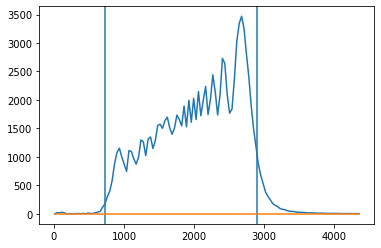

In [266]:
plt.plot(z,abs(E1.Ex)**2+abs(E1.Ey)**2)
plt.axvline(zmin)
plt.axvline(zmax)
plt.plot(z,abs(E1.Ez)**2)

Wall time: 29.1 s


<AxesSubplot:xlabel='$z  (\\mu m)$', ylabel='$x  (\\mu m)$'>

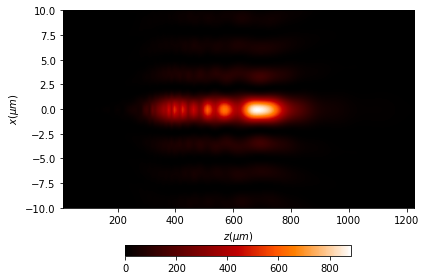

In [253]:
%%time

# compute an XZ slice of the field
E1=E0.CZT(z, x_out, y_out)
E1.draw('intensity')

In [125]:
rmin/tan(pi-beta), rmax/beta

(-227.9433040059341, 912.3578568916643)

In [127]:
sin(arctan(2/15))

0.13216372009101796

In [119]:
(zmin + zmax)/2

569.858260014834

Wall time: 1.09 s


(<AxesSubplot:title={'center':'$I_r$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$I_z$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>)

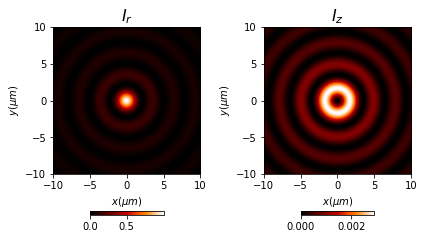

In [268]:
%%time
E1=E0.CZT((zmin + zmax)/2, x_out, x_out)
E1.normalize()
E1.draw('intensities_rz',logarithm=False)

Wall time: 5.86 sor 1.55


(<AxesSubplot:title={'center':'$I_r$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <AxesSubplot:title={'center':'$I_z$'}, xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>)

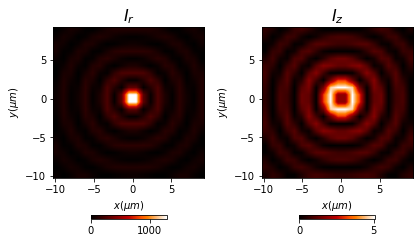

In [269]:
%%time
E1 = E0.VRS(z=(zmin + zmax)/2, n=1, new_field=True, verbose=True, amplification=(1, 1))
E1.cut_resample(x_limits=(-x_samp, x_samp), y_limits=(-x_samp, x_samp))
E1.draw(kind='intensities_rz', logarithm=False)